### Imports

In [8]:
import pandas
import tensorflow as tf
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load Model

In [9]:
model = load_model('../vggseg.h5')

### Predict

In [158]:
im = cv2.imread('2.jpg')

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_arr = np.array(im)
im_resized = cv2.resize(im_arr, (256,256), interpolation = cv2.INTER_NEAREST)
im_in = np.expand_dims(im_resized, axis=0)

f_pred = model.predict(im_in, batch_size=1)

1/1 [==============================] - 0s 373ms/step


### Refine Prediction

(1, 16384, 2)
[[0.98502916 0.9954183  0.99701405 ... 0.99793905 0.9959202  0.99094313]
 [0.99468863 0.997436   0.9980914  ... 0.999421   0.9989785  0.9971988 ]
 [0.9955024  0.99786013 0.99843353 ... 0.9995253  0.99927884 0.998256  ]
 ...
 [0.9997762  0.9999033  0.99987614 ... 0.99992216 0.9998325  0.9994161 ]
 [0.9995783  0.9998652  0.99986434 ... 0.99986744 0.9997633  0.9991596 ]
 [0.9984665  0.9996536  0.99979    ... 0.99965656 0.99941766 0.996289  ]]
[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


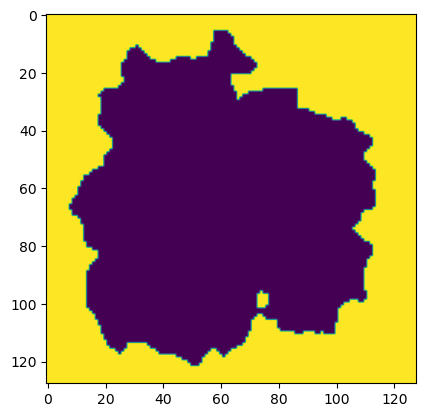

In [159]:
print(f_pred.shape)
mask = np.reshape(f_pred, (128, 128, -1))
mask = mask[:, :, 0]
print(mask)
mask[mask < 0.9],  mask[mask > 0.9] = 0, 255

print(mask)

plt.imshow(mask)

### Visualize

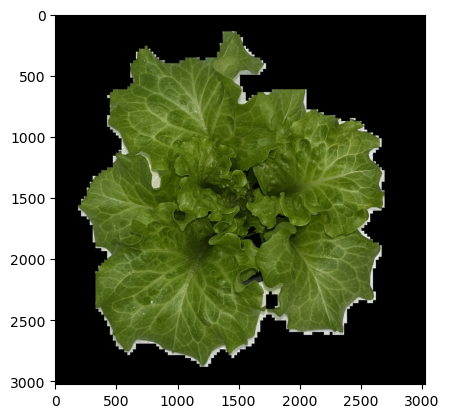

In [160]:
mask_resized = cv2.resize(mask, (3024, 3024), interpolation=cv2.INTER_NEAREST)
mask_resized = np.uint8(mask_resized)
mask_resized = np.invert(mask_resized)
masked = cv2.bitwise_and(im_arr, im_arr, mask=mask_resized)
plt.imshow(masked)